<a href="https://colab.research.google.com/github/ahcamachod/1921-machine-learning-clasificacion-entre-bastidores/blob/proyecto-final/tecnicas_de_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning: Clasificación entre Bastidores**

En este notebook estaremos desarrollando varias técnicas de clasificación para un conjunto de datos de una empresa de telecomunicaciones.

En caso de que desees consultar el dataset original, este se encuentra en el siguiente enlace:
https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?select=churn-bigml-20.csv

## Aula 1

### 1.2 Importando los datos

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

datos = pd.read_csv('/content/drive/MyDrive/bootcamp_data_science/customer_churn.csv')
datos.head()

,Mayor65Anos,Conyuge,Dependientes,MesesDeContrato,TelefonoFijo,VariasLineasTelefonicas,ServicioDeInternet,SeguridadOnline,BackupOnline,SeguroEnDispositivo,SoporteTecnico,TVaCable,StreamingDePeliculas,TipoDeContrato,PagoOnline,FormaDePago,CuentaMensual,Churn
0,0,Si,No,1,No,SinServicioTelefonico,DSL,No,Si,No,No,No,No,Mensual,Si,ChequeDigital,29.85,No
1,0,No,No,34,Si,No,DSL,Si,No,Si,No,No,No,Anual,No,ChequePapel,56.95,No
2,0,No,No,2,Si,No,DSL,Si,Si,No,No,No,No,Mensual,Si,ChequePapel,53.85,Si
3,0,No,No,45,No,SinServicioTelefonico,DSL,Si,No,Si,Si,No,No,Anual,No,DebitoAutomatico,42.30,No
4,0,No,No,2,Si,No,FibraOptica,No,No,No,No,No,No,Mensual,Si,ChequeDigital,70.70,Si


In [3]:
datos.shape

(7043, 18)

### 1.3 Tipos de variables

In [4]:
datos.head()

,Mayor65Anos,Conyuge,Dependientes,MesesDeContrato,TelefonoFijo,VariasLineasTelefonicas,ServicioDeInternet,SeguridadOnline,BackupOnline,SeguroEnDispositivo,SoporteTecnico,TVaCable,StreamingDePeliculas,TipoDeContrato,PagoOnline,FormaDePago,CuentaMensual,Churn
0,0,Si,No,1,No,SinServicioTelefonico,DSL,No,Si,No,No,No,No,Mensual,Si,ChequeDigital,29.85,No
1,0,No,No,34,Si,No,DSL,Si,No,Si,No,No,No,Anual,No,ChequePapel,56.95,No
2,0,No,No,2,Si,No,DSL,Si,Si,No,No,No,No,Mensual,Si,ChequePapel,53.85,Si
3,0,No,No,45,No,SinServicioTelefonico,DSL,Si,No,Si,Si,No,No,Anual,No,DebitoAutomatico,42.30,No
4,0,No,No,2,Si,No,FibraOptica,No,No,No,No,No,No,Mensual,Si,ChequeDigital,70.70,Si


In [5]:
#creamos un diccionario  para cambiar los varibles calificativas en numericas. para mejor procesamientode de los datos por el cmputador.
#cuandos ea si va ser ahora 1 y cuando seano ahora vas er 0
traduccion = {'Si':1, 'No':0}
#lo hacmeos de forma manual
datos_modificados = datos[['Conyuge','Dependientes',
                           'TelefonoFijo','PagoOnline','Churn']].replace(traduccion)

datos_modificados.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [6]:
#usamos un recurso de pandas para modificar el data frame
#con sta funcion cambiamos los datos por ceros y 1,. para evitar modificar laq hicimos manuelamente usamos la funcion drop. y el parametro axis para indicar q son las columnas.
datos_dummy = pd.get_dummies(datos.drop(columns=['Conyuge','Dependientes',
                           'TelefonoFijo','PagoOnline','Churn'],axis=1))

In [7]:
#almancemos losdos datas set modificaos en una variable para eso lo concatenamos con la funcion concat.
datos_final = pd.concat([datos_modificados,datos_dummy], axis=1)
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor65Anos,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,...,StreamingDePeliculas_No,StreamingDePeliculas_Si,StreamingDePeliculas_SinServicioDeInternet,TipoDeContrato_Anual,TipoDeContrato_Bienal,TipoDeContrato_Mensual,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoAutomatico,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,...,1,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,...,1,0,0,1,0,0,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,0,1,1,0,0,0


### 1.5 Definición Formal

Información para la clasificación:

$X$ = inputs (datos de entrada)

$y$ = outputs (datos de saída)

In [8]:
#establecemos el nro de columnas maximas q queremos colocar
pd.set_option('display.max_columns',39)

In [9]:
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor65Anos,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVaCable_No,TVaCable_Si,TVaCable_SinServicioDeInternet,StreamingDePeliculas_No,StreamingDePeliculas_Si,StreamingDePeliculas_SinServicioDeInternet,TipoDeContrato_Anual,TipoDeContrato_Bienal,TipoDeContrato_Mensual,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoAutomatico,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0


In [10]:
#mi y depnde de las funciones aplicado a mis 39 atributos o caracteristicas


$y_i$ = $f(x_i)$

In [11]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [12]:
#ymaria=?   que esS

Nuevos pares de información = ($Xmaria$, $ymaria$)

### 1.6 Balanceo de los datos

<Axes: xlabel='Churn', ylabel='count'>

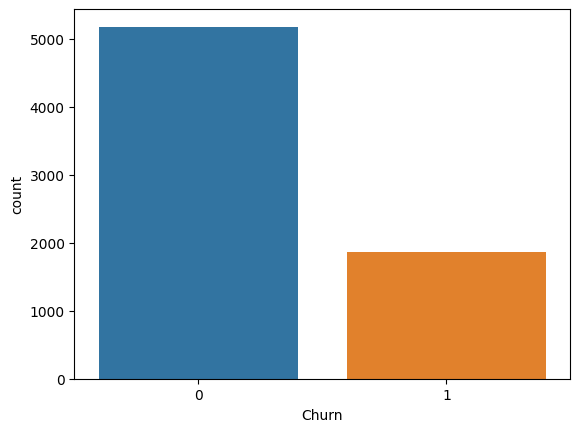

In [13]:
import seaborn as sns

sns.countplot(x='Churn', data=datos_final)

In [14]:
#vamos completar a los 1869 registro para q sean iguakles q los 5174.
datos_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [15]:
#importamos el apuqete apracrear un balacimento.
from imblearn.over_sampling import SMOTE
#hacemos una sepraracion en nuestro data set
X = datos_final.drop(columns='Churn', axis=1)
y = datos_final['Churn']
#intacaimos smoke y recibe de parametro un estado de aletoridad
smt = SMOTE(random_state=123)
#porcedemos conel balanciamento con el apquete smoke de x y y.
X, y = smt.fit_resample(X,y)

In [16]:
datos_final.shape

(7043, 39)

In [17]:
#concadenamos x y y en el eje 1(columnas)
datos_final = pd.concat([X,y], axis=1)
datos_final.shape

(10348, 39)

In [18]:
#ahora tenemos un balencaimeinto entre 0 y 1 en la columna churm
#quedo balanceado

In [19]:
datos_final.sample(5)

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Mayor65Anos,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVaCable_No,TVaCable_Si,TVaCable_SinServicioDeInternet,StreamingDePeliculas_No,StreamingDePeliculas_Si,StreamingDePeliculas_SinServicioDeInternet,TipoDeContrato_Anual,TipoDeContrato_Bienal,TipoDeContrato_Mensual,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoAutomatico,FormaDePago_TarjetaDeCredito,Churn
54,1,1,1,1,1,60,74.85,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
6608,0,0,1,1,0,22,55.15,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1
3248,1,0,1,1,1,10,86.65,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1
5090,1,0,1,1,1,7,94.70,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1
129,0,0,0,1,1,71,56.45,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0


In [20]:
datos_final.Churn.value_counts()
#nuestras calses quedaron iguales

0    5174
1    5174
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

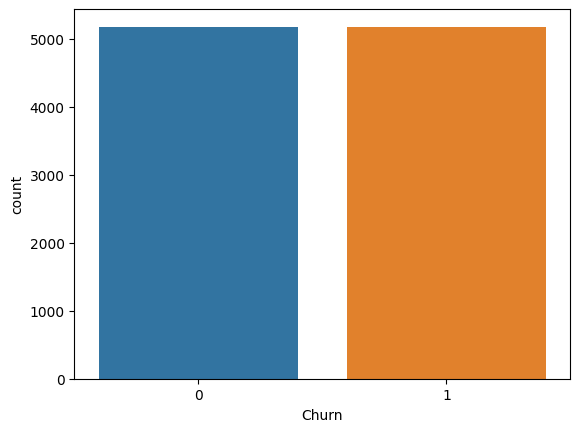

In [21]:
sns.countplot(x='Churn', data= datos_final)

In [22]:
#con over sampling hicemos un sobre muestreo para completar los regsitros con informacion ficticia, apra q nuestro clasificador  pueda identificar mejor
# esa frontera de deciciones

## Aula 2

### 2.2 KNN entre bastidores

In [23]:
#nuestro arraay que tenemos de maria
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [24]:
#ymaria = ?

In [25]:
X = datos_final.drop(columns='Churn', axis=1)#vaser todas las columnas excepto chrun
y = datos_final['Churn']#y va a ser unicamente la cloumna chru

In [26]:
#standarizamos nuestos datos. con la siguiente importacion
from sklearn.preprocessing import StandardScaler
#estadarizamos las escala de nuestos datos
#y los instaciamos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)#toma todos los valores de x que definimos antreriormente y los estadariza a un sola escala

In [27]:
X_std[0]

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.88447396, -0.83366906,  3.18604176,
        1.51268338, -1.04386816, -0.44617598,  0.86827317, -0.51721942,
       -0.44617598, -0.95834643,  1.57389661, -0.44617598,  1.04285807,
       -0.64211419, -0.44617598,  0.87979784, -0.52426638, -0.44617598,
        1.18690873, -0.77707385, -0.44617598,  1.20311799, -0.78976268,
       -0.44617598, -0.41989297, -0.44648735,  0.73788726,  1.30373042,
       -0.47912706, -0.4360152 , -0.42576817])

In [56]:
#instaciamos y uego creamos un dataframe con los datos de xmaria(para estadarizar tiene q estar en un datarame)
Xmaria_std = scaler.transform(pd.DataFrame(Xmaria, columns=X.columns))

Distancia Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

In [ ]:
#tenemosq obtener la dsitacaia desde Xmaria_std hasta el punto de X_std[0]

In [29]:
import numpy as np
#establecemos a y b
a = Xmaria_std
b = X_std[0]
#instaciamos la resta y la exponenciacion
exponenciacion = np.square(a-b)
#realizamos la suma de los puntos de la exponuncaicion
suma = np.sum(exponenciacion)
#instaciamos el resultado
distancia = np.sqrt(suma)
print(f'La distancia euclidiana de María con respecto al primer registro del dataset es: {distancia}')

La distancia euclidiana de María con respecto al primer registro del dataset es: 9.546414124830829


### 2.3 Implementando el modelo KNN

In [30]:
from sklearn.model_selection import train_test_split
#definimos los datos de estranamuento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
#istancaimos el knn y definims en metricas la medida euclidiana
knn = KNeighborsClassifier(metric='euclidean')
#introducimos a nuestro fit los datos de entrenameniento
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [32]:
#instaciamos el knn de prediccion con los datos de purbea
prevision_knn = knn.predict(X_test)

In [33]:
#con esto conseguimos un knn que clasifica nuestros datos
prevision_knn

array([1, 0, 1, ..., 1, 1, 1])

## Aula 3

### 3.3 Implementando el modelo Bernoulli Naive Bayes

In [ ]:
#cuando trabajamos con probalidad y estadistica es improtante analizar la distribucuion de nuestos datos y obtener la mejores pruebas exstadisticas.

In [34]:
mediana = np.median(X_train)

In [35]:
#importamos y instancamos
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=mediana)

In [36]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [37]:
prevision_bnb = bnb.predict(X_test)

In [38]:
prevision_bnb

array([1, 0, 0, ..., 1, 1, 1])

## Aula 4

### 4.3 Implementando el modelo de Árbol de Decisión

In [39]:
#imporamos y intaciamos
from sklearn.tree import DecisionTreeClassifier
#usamos un criterio de entropi y estado de aletoriedad
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
#damos un fit auestro datos de entrenamiento.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [41]:
dtc.feature_importances_

array([0.02377959, 0.0140184 , 0.006427  , 0.02068509, 0.01622046,
       0.16336089, 0.22060732, 0.00893062, 0.01068695, 0.00344576,
       0.0026108 , 0.03128648, 0.00027769, 0.00937665, 0.01663757,
       0.00065123, 0.00426312, 0.01081522, 0.00368329, 0.00850781,
       0.00818099, 0.        , 0.01462735, 0.02004135, 0.        ,
       0.00474437, 0.00323532, 0.        , 0.00842423, 0.01127152,
       0.        , 0.07445054, 0.03622159, 0.16358635, 0.0213992 ,
       0.0204582 , 0.01858719, 0.01849987])

In [42]:
prevision_dtc = dtc.predict(X_test)

In [43]:
prevision_dtc

array([0, 0, 0, ..., 1, 1, 1])

## Aula 5

### 5.1 Matriz de Confusión

![img](https://miro.medium.com/max/799/1*XsFcyoLXNdAkbSfNGnxhEg.png)

In [44]:
#importamos la matris de confucion.
from sklearn.metrics import confusion_matrix
#imprimos la matriz de confucuion apra el modelo KNN
print(confusion_matrix(y_test, prevision_knn))

[[1125  444]
 [ 152 1384]]


In [45]:
#imprimmos la matriz de confucion para el modelo de BERNULi
print(confusion_matrix(y_test, prevision_bnb))

[[1075  494]
 [ 233 1303]]


In [46]:
#graficamos la matriz para el modelo de arbol de decicion
print(confusion_matrix(y_test, prevision_dtc))

[[1241  328]
 [ 278 1258]]


### 5.2 Exactitud

> A partir del cálculo de la matriz de confusión logramos inferir otras métricas, como por ejemplo la exactitud.

$exactitud$ = ${TP + TN \over TP + FP + TN + FN}$

In [47]:
#importamos la metrica de exatictud
from sklearn.metrics import accuracy_score
#como parametros la metrica accurity recibe nuestra "y" real la "y" de prueba y nuestra previsicion por arte del algaritmo knn
print(accuracy_score(y_test, prevision_knn))

0.8080515297906602


In [48]:
#medimos la exactitud para nuestro modelo bernullinavesbaise, con los parametros de "y" real y prevision para bnb
print(accuracy_score(y_test, prevision_bnb))

0.7658615136876007


In [49]:
#medimos la exactitud para nuestro modelo arbol de decicion, con los parametros de "y" real y prevision para el arbon de decicion
print(accuracy_score(y_test, prevision_dtc))

0.8048309178743961


### 5.3 Precisión

> Otra métrica importante es la precisión, que calcula cuántas observaciones fueron clasificadas correctamente como positivas ($TP$).

$precision$ = ${TP \over TP + FP}$

In [50]:
#importamos la metrica apra calcualar la preccion y calcularemos la precicion para los mdelos knn,bnb y arbol de deciciones.
from sklearn.metrics import precision_score

print(precision_score(y_test, prevision_knn))

0.7571115973741794


In [51]:
print(precision_score(y_test, prevision_bnb))

0.7250973845297718


In [52]:
print(precision_score(y_test, prevision_dtc))

0.7931904161412359


### 5.4 Recall

> Además, existe una métrica conocida como Recall o sensibilidad, que calcula qué tan bien el modelo clasifica correctamente un resultado positivo ($TP$).

$recall$ = ${TP \over TP + FN}$


In [53]:
#improtamos la metrica para calcualar la sensibilidad y calcaualamos la senbilidad para todos lso medelos anteriormente creados
from sklearn.metrics import recall_score

print(recall_score(y_test, prevision_knn))

0.9010416666666666


In [54]:
print(recall_score(y_test, prevision_bnb))

0.8483072916666666


In [55]:
print(recall_score(y_test, prevision_dtc))

0.8190104166666666


#5.5
